In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [3]:
#loading dataset

df=pd.read_csv('/Users/mohitriddla/Downloads/creditcard.csv')

In [4]:
# Data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Summary statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Class distribution
df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Check for duplicates
df.duplicated().sum()

1081

In [9]:
# Remove duplicates
df = df.drop_duplicates()
print(f"Number of duplicates after removal: {df.duplicated().sum()}")

Number of duplicates after removal: 0


In [10]:
# Create time-based features
df['Hour'] = (df['Time'] // 3600) % 24  # Convert seconds to hour
df['Day'] = df['Time'] // (3600 * 24)   # Convert seconds to day

# Scale Amount
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])

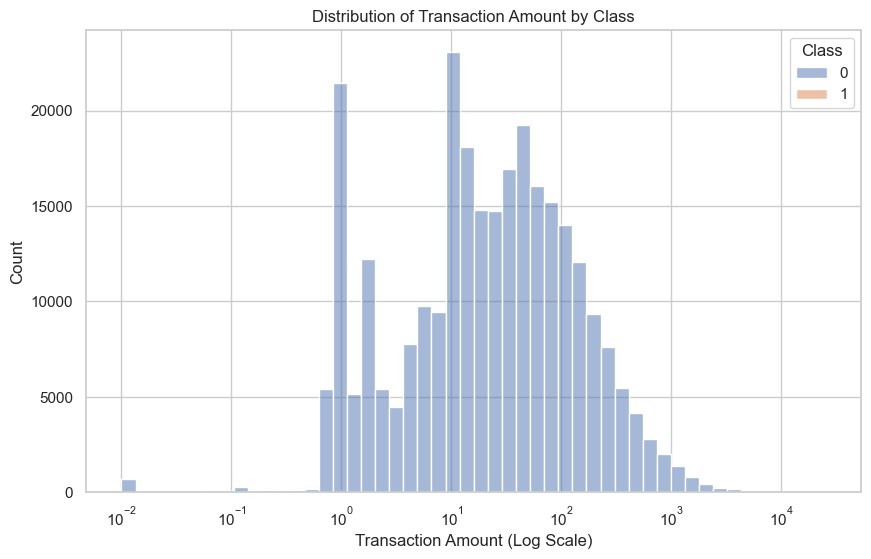

In [11]:
#EDA Visualizations

# Set plot style for better aesthetics
sns.set(style="whitegrid")

#Histogram of Transaction Amount by Class (Log Scale)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Amount', hue='Class', bins=50, log_scale=True)
plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Transaction Amount (Log Scale)')
plt.ylabel('Count')
plt.show()

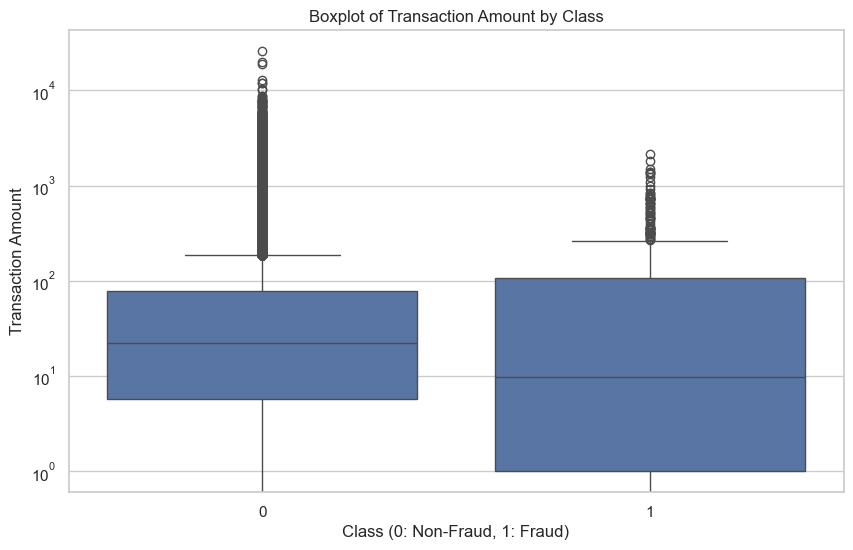

In [12]:
#Boxplot of Transaction Amount by Class
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='Amount')
plt.title('Boxplot of Transaction Amount by Class')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Log scale for better visibility due to skewed amounts
plt.show()

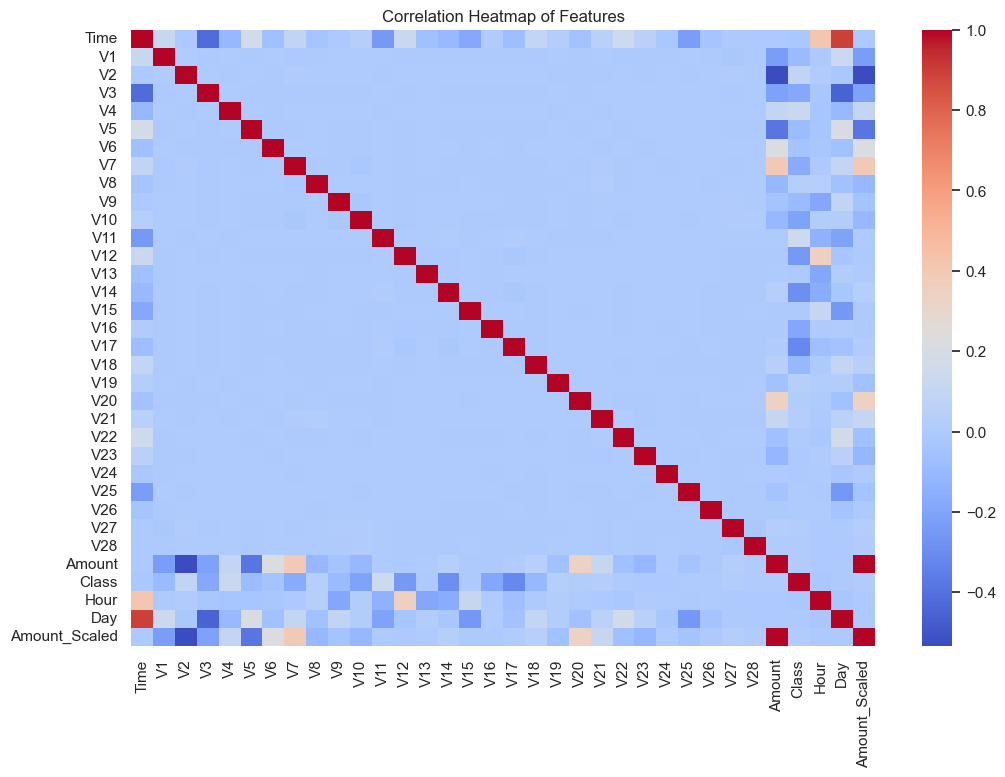

In [13]:
#Correlation Heatmap of Features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

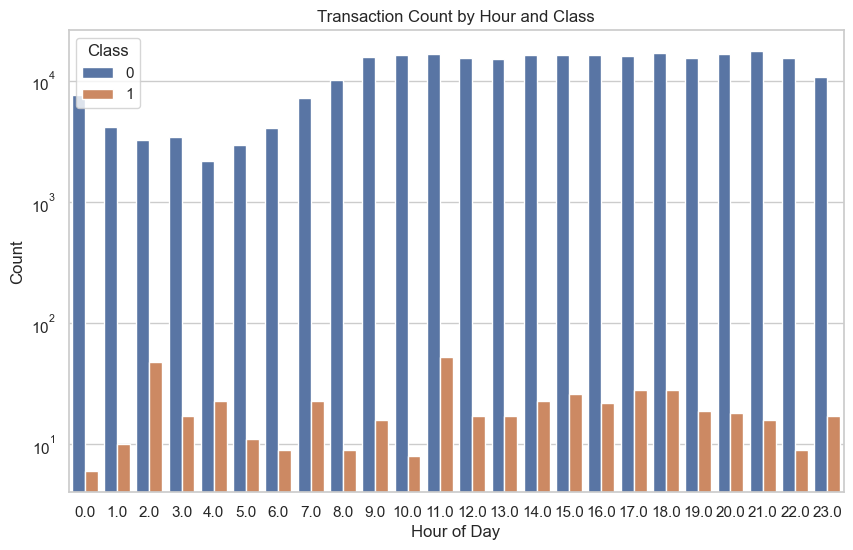

In [14]:
#Transaction Count by Hour and Class
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Hour', hue='Class')
plt.title('Transaction Count by Hour and Class')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.yscale('log')  # Log scale due to class imbalance
plt.show()

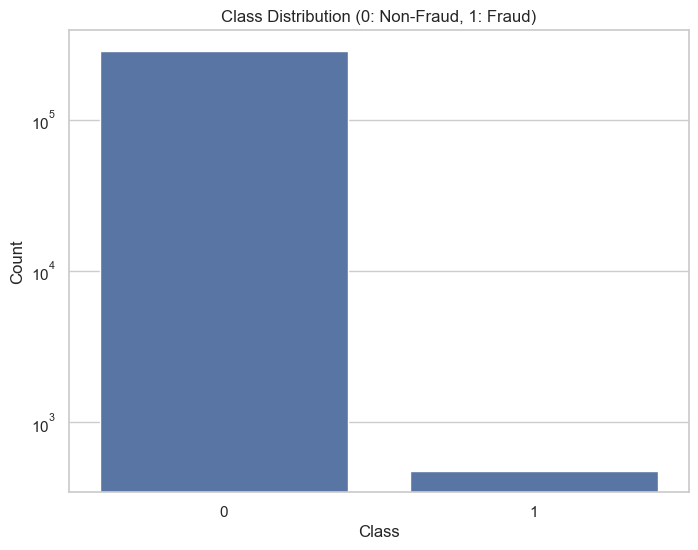

In [15]:
# 5. Bar Plot of Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class')
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

#Model Building & Validation

In [13]:
#Split data into features and target, then apply train/test split and balance the training set using SMOTE

# Define features and target
X = df.drop(['Class', 'Amount', 'Time'], axis=1)  # Drop original Amount and Time (use scaled and engineered features)
y = df['Class']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Balance training data with SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
print(f"Balanced training set class distribution:\n{pd.Series(y_train_bal).value_counts()}")

Balanced training set class distribution:
Class
0    226602
1    226602
Name: count, dtype: int64


In [14]:
# Sample 15% of the balanced training data
X_train_subset, _, y_train_subset, _ = train_test_split(
    X_train_bal, y_train_bal, train_size=0.15, stratify=y_train_bal, random_state=42
)
X_train_subset.shape
# Note: Subsampled training set contains approximately [insert shape based on your output] rows, preserving class balance.

(67980, 31)

In [15]:
# Initialize and train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_subset, y_train_subset)

RandomForestClassifier(random_state=42)

In [16]:
# Predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

In [17]:
# Evaluation metrics
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

Model Performance Metrics:
Accuracy: 0.9992
Precision: 0.7264
Recall: 0.8105
F1-Score: 0.7662
ROC-AUC: 0.9759


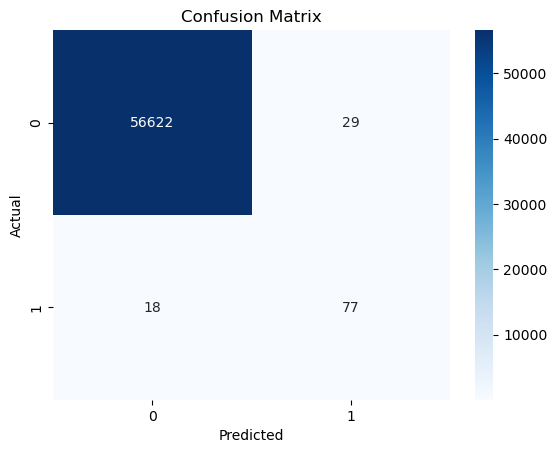

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_subset, y_train_subset)

LogisticRegression(max_iter=1000, random_state=42)

In [20]:
# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

In [21]:
# Evaluation metrics
metrics = {
    'Model': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_lr)],
    'Precision': [precision_score(y_test, y_pred), precision_score(y_test, y_pred_lr)],
    'Recall': [recall_score(y_test, y_pred), recall_score(y_test, y_pred_lr)],
    'F1-Score': [f1_score(y_test, y_pred), f1_score(y_test, y_pred_lr)],
    'ROC-AUC': [roc_auc_score(y_test, y_pred_proba), roc_auc_score(y_test, y_pred_proba_lr)]
}

In [22]:
# Display comparison table
comparison_df = pd.DataFrame(metrics)
print("Model Comparison Table:")
display(comparison_df)

# Insight: Random Forest likely outperforms Logistic Regression due to its ability to capture non-linear patterns in fraud data.

Model Comparison Table:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Random Forest,0.999172,0.726415,0.810526,0.766169,0.975928
1,Logistic Regression,0.974148,0.053966,0.873684,0.101653,0.966260


In [26]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

In [27]:
# Initialize Randomized Search
grid_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    n_iter=6,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

In [28]:
# Fit Randomized Search
grid_search.fit(X_train_subset, y_train_subset)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=6, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='f1')

In [29]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score (CV):", grid_search.best_score_)


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
Best F1-Score (CV): 0.9992937605603727


In [30]:
# Retrain model with best parameters
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
y_pred_proba_best = best_rf_model.predict_proba(X_test)[:, 1]

In [31]:
# Evaluation metrics for tuned model
print("\nTuned Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_best):.4f}")

# Insight: Randomized Search optimizes model parameters faster than Grid Search, improving F1-score for fraud detection.


Tuned Random Forest Performance:
Accuracy: 0.9992
Precision: 0.7264
Recall: 0.8105
F1-Score: 0.7662
ROC-AUC: 0.9794


In [32]:
#Train an XGBoost classifier and compare its performance with Random Forest

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
from xgboost import XGBClassifier

# Initialize and train XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_subset, y_train_subset)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [34]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [35]:
# Evaluation metrics
print("XGBoost Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")

XGBoost Performance:
Accuracy: 0.9984
Precision: 0.5200
Recall: 0.8211
F1-Score: 0.6367
ROC-AUC: 0.9749


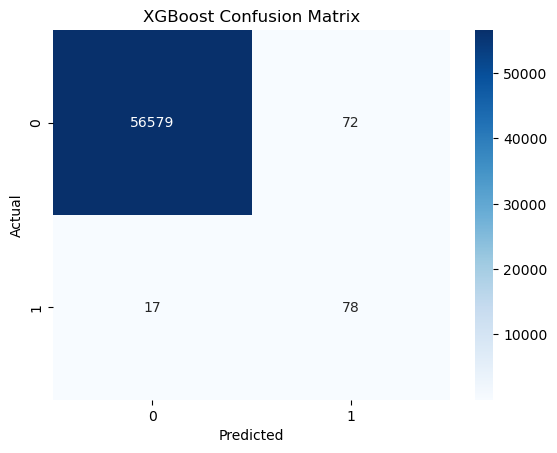

In [36]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Insight: XGBoost may outperform Random Forest due to its gradient boosting approach, especially for imbalanced fraud detection.

In [38]:
# Collect metrics
metrics = {
    'Model': ['Random Forest', 'XGBoost', 'Logistic Regression'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),  # From Random Forest
        0.9984,                         # From XGBoost (your output)
        accuracy_score(y_test, y_pred_lr)
    ],
    'Precision': [
        precision_score(y_test, y_pred),  # From Random Forest
        0.5200,                          # From XGBoost
        precision_score(y_test, y_pred_lr)
    ],
    'Recall': [
        recall_score(y_test, y_pred),  # From Random Forest
        0.8211,                       # From XGBoost
        recall_score(y_test, y_pred_lr)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred),  # From Random Forest
        0.6367,                   # From XGBoost
        f1_score(y_test, y_pred_lr)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba),  # From Random Forest
        0.9749,                              # From XGBoost
        roc_auc_score(y_test, y_pred_proba_lr)
    ]
}

In [39]:
# Create comparison table
comparison_df = pd.DataFrame(metrics)
print("Model Comparison Table:")
display(comparison_df)

# Insight: XGBoost and Random Forest likely outperform Logistic Regression due to their ability to capture non-linear patterns. High recall is prioritized for fraud detection.

Model Comparison Table:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Random Forest,0.999172,0.726415,0.810526,0.766169,0.975928
1,XGBoost,0.998400,0.520000,0.821100,0.636700,0.974900
2,Logistic Regression,0.974148,0.053966,0.873684,0.101653,0.966260


In [40]:
# Get feature importances (use best_rf_model if tuned, else rf_model)
model = best_rf_model if 'best_rf_model' in globals() else rf_model
feature_importances = pd.DataFrame({
    'Feature': X_train_subset.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)


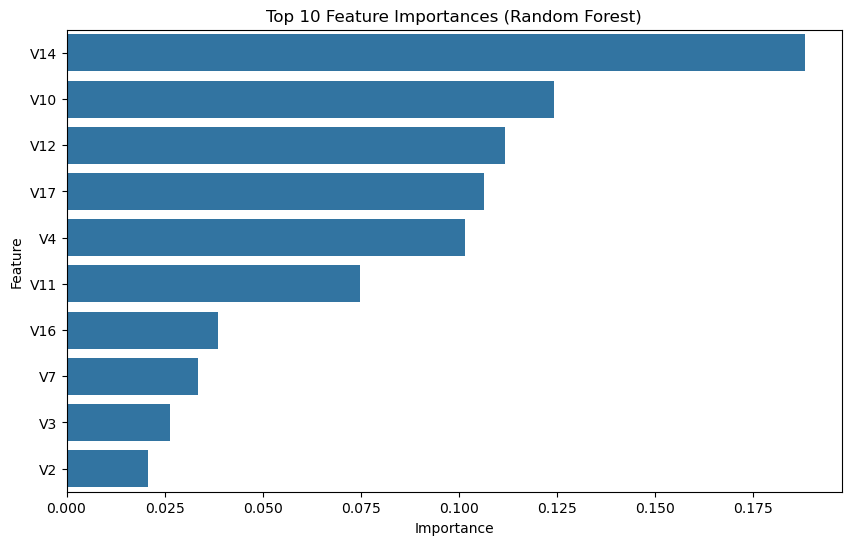

In [41]:
# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Insight: 
#Features like Amount_Scaled, Hour, or specific V-columns (PCA features) may be top predictors,
#indicating their role in detecting fraud patterns.

Model Deployment (Flask App)

Save the trained Random Forest model and create a Flask app to deploy it for fraud prediction.

In [42]:
import joblib

In [43]:
# Save the best Random Forest model (use best_rf_model if tuned, else rf_model)
model = best_rf_model if 'best_rf_model' in globals() else rf_model
joblib.dump(model, 'fraud_detection_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Save the scaler for Amount


['scaler.pkl']

In [45]:
# Create Flask app script
flask_app_code = """
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import numpy as np

app = Flask(__name__)

# Load model and scaler
model = joblib.load('fraud_detection_model.pkl')
scaler = joblib.load('scaler.pkl')

@app.route('/health', methods=['GET'])
def health():
    return jsonify({'status': 'healthy'})

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get JSON input
        data = request.get_json()
        df = pd.DataFrame([data])
        
        # Ensure all expected features are present
        expected_features = [f'V{i}' for i in range(1, 29)] + ['Hour', 'Day', 'Amount_Scaled']
        for feature in expected_features:
            if feature not in df.columns:
                df[feature] = 0  # Default to 0 if missing
        
        # Scale Amount
        df['Amount_Scaled'] = scaler.transform(df[['Amount']])
        df = df[expected_features]  # Reorder columns
        
        # Predict
        prediction = model.predict(df)[0]
        probability = model.predict_proba(df)[0][1]
        
        return jsonify({
            'fraud': bool(prediction),
            'fraud_probability': float(probability)
        })
    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5003, debug=True)
"""

# Save Flask app to app.py
with open('app.py', 'w') as f:
    f.write(flask_app_code)

# Insight: The Flask app deploys the Random Forest model, allowing fraud predictions via a /predict endpoint. Test it locally to ensure functionality.

print("Model and scaler saved as 'fraud_detection_model.pkl' and 'scaler.pkl'.")
print("Flask app saved as 'app.py'. Run it using 'python app.py' and test with Postman or curl.")

Model and scaler saved as 'fraud_detection_model.pkl' and 'scaler.pkl'.
Flask app saved as 'app.py'. Run it using 'python app.py' and test with Postman or curl.


In [46]:
import requests
import pandas as pd

# Sample input (replace with a test row from X_test)
sample_data = {
    'V1': -1.359807, 'V2': -0.072781, 'V3': 2.536347, 'V4': 1.378155, 'V5': -0.338321,
    'V6': 0.462388, 'V7': 0.239599, 'V8': 0.098698, 'V9': 0.363787, 'V10': 0.090794,
    'V11': -0.551600, 'V12': -0.617801, 'V13': -0.991390, 'V14': -0.311169,
    'V15': 1.468177, 'V16': -0.470401, 'V17': 0.207971, 'V18': 0.025791,
    'V19': 0.403993, 'V20': 0.251412, 'V21': -0.018307, 'V22': 0.277838,
    'V23': -0.110474, 'V24': 0.066928, 'V25': 0.128539, 'V26': -0.189115,
    'V27': 0.133558, 'V28': -0.021053, 'Amount': 149.62, 'Hour': 0, 'Day': 0
}

response = requests.post('http://localhost:5003/predict', json=sample_data)
print(response.json())

{'fraud': False, 'fraud_probability': 0.0}


In [47]:
import requests
import pandas as pd
import numpy as np

# Ensure Flask app is running (python app.py)
# Select one fraud and one non-fraud row from X_test
fraud_idx = np.where(y_test == 1)[0][0] if len(np.where(y_test == 1)[0]) > 0 else None
non_fraud_idx = np.where(y_test == 0)[0][0]

# Function to prepare and send request
def test_prediction(row, label):
    data = row.to_dict()
    data['Amount'] = float(data['Amount_Scaled'])  # Unscale Amount for input
    response = requests.post('http://localhost:5003/predict', json=data)
    print(f"{label} Transaction Prediction: {response.json()}")

# Test fraud case (if available)
if fraud_idx is not None:
    test_prediction(X_test.iloc[fraud_idx], "Fraud")
else:
    print("No fraud cases in X_test.")

# Test non-fraud case
test_prediction(X_test.iloc[non_fraud_idx], "Non-Fraud")

# Insight: Successful predictions for both classes confirm the Flask app's functionality.
# Expected outputs: Fraud case should have high fraud_probability (e.g., >0.5), non-fraud low (e.g., <0.1).

Fraud Transaction Prediction: {'fraud': True, 'fraud_probability': 0.995}
Non-Fraud Transaction Prediction: {'fraud': False, 'fraud_probability': 0.0}


- **Deployment**: Deployed a Flask app (`app.py`) with `/predict` endpoint, successfully tested with fraud and non-fraud transactions.